In [67]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import normal
from scipy import stats
from sklearn.neighbors import KernelDensity

In [23]:
lst = [random.randint(1, 6) for _ in range(10000)]

In [24]:
len(lst)

10000

In [25]:
series = pd.Series(lst)

probabilities = (series.value_counts()/series.value_counts().sum()).sort_index()
probabilities

1    0.1671
2    0.1710
3    0.1581
4    0.1667
5    0.1724
6    0.1647
Name: count, dtype: float64

<Axes: >

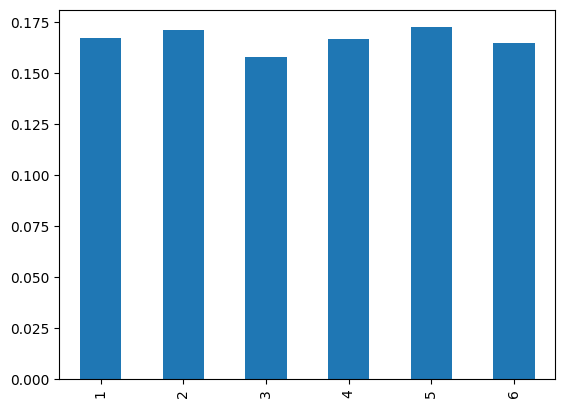

In [26]:
probabilities.plot(kind='bar')

In [27]:
lst = []
for _ in range(10000):
    lst.append(random.randint(1, 6) + random.randint(1, 6))

len(lst)

10000

In [28]:
# Probability Mass Function
series = pd.Series(lst)

probabilities = (series.value_counts()/series.value_counts().sum()).sort_index()
probabilities

2     0.0276
3     0.0535
4     0.0884
5     0.1062
6     0.1397
7     0.1716
8     0.1367
9     0.1104
10    0.0821
11    0.0505
12    0.0333
Name: count, dtype: float64

<Axes: >

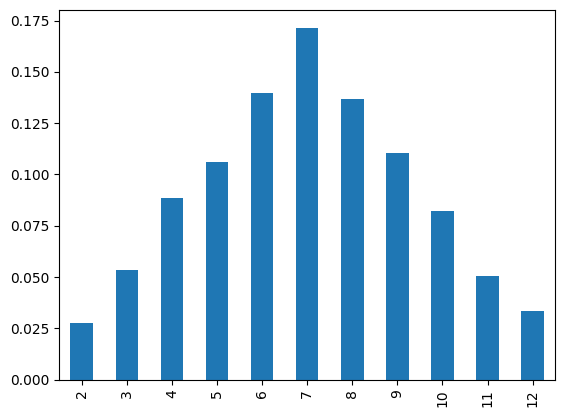

In [29]:
# PMF
probabilities.plot(kind='bar')

In [30]:
# Comulative Distribution Function
np.cumsum(probabilities)

2     0.0276
3     0.0811
4     0.1695
5     0.2757
6     0.4154
7     0.5870
8     0.7237
9     0.8341
10    0.9162
11    0.9667
12    1.0000
Name: count, dtype: float64

<Axes: >

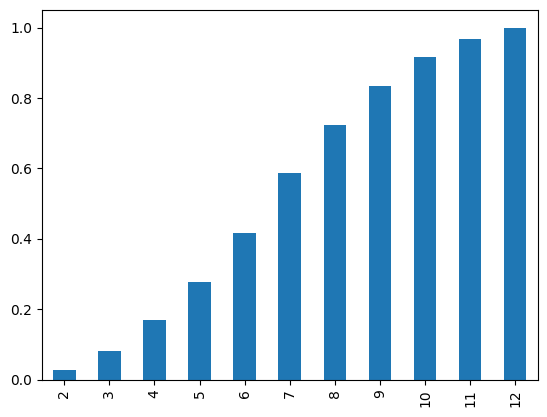

In [31]:
# CDF
np.cumsum(probabilities).plot(kind='bar')

## Parametric Density Function

In [34]:
# sample data
sample = normal(loc=50, scale=5, size=1000)

sample

array([49.98476382, 49.21947671, 44.25525643, 49.01249641, 50.91412275,
       48.43992485, 48.81691189, 50.72034557, 49.36303894, 33.74517637,
       49.08614772, 55.88733476, 47.04196999, 55.14878204, 58.22827761,
       39.89923264, 57.18535808, 43.65256526, 53.11596126, 41.20339521,
       45.1023465 , 46.5848842 , 53.13334861, 53.16347272, 49.7026633 ,
       46.97827571, 47.43927234, 52.48555315, 47.24106071, 47.60347879,
       47.47004575, 35.43125516, 52.07776551, 47.28613397, 54.62029377,
       49.17858294, 54.65735122, 53.90105068, 43.64495319, 50.62527002,
       39.42035083, 51.6159111 , 47.63010558, 54.80504739, 50.77977292,
       49.5838544 , 46.99571707, 51.90826809, 48.82690906, 51.04789549,
       51.1616765 , 47.52777909, 53.02898683, 48.95983721, 58.95458459,
       51.32281241, 51.10978578, 46.43470468, 51.48985616, 47.25552897,
       47.78593503, 57.08277677, 49.11097765, 43.0885686 , 57.56946304,
       40.81772718, 47.90499623, 36.20012421, 55.68583495, 49.61

(array([  7.,  18.,  76., 151., 218., 242., 170.,  70.,  39.,   9.]),
 array([33.74517637, 36.87958246, 40.01398855, 43.14839464, 46.28280072,
        49.41720681, 52.5516129 , 55.68601899, 58.82042508, 61.95483117,
        65.08923726]),
 <BarContainer object of 10 artists>)

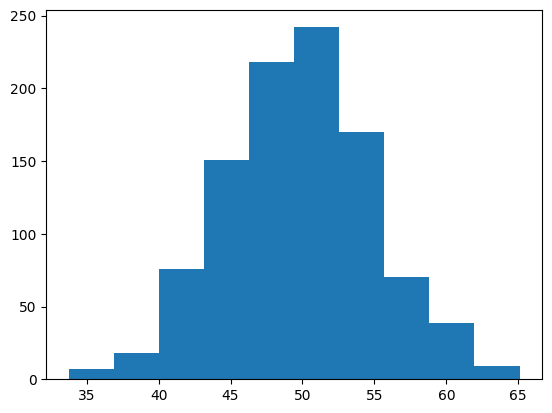

In [35]:
plt.hist(sample, bins=10)

In [37]:
sample_mean = sample.mean()
sample_sigma = sample.std()

sample_sigma

5.062767199480561

In [41]:
# fit distribution with above parameters

distribution = stats.norm(sample_mean, sample_sigma)

distribution

In [42]:
sample.min()

33.745176366660324

In [43]:
sample.max()

65.08923726166027

In [45]:
values = np.linspace(sample.min(), sample.max(), 100)

values

array([33.74517637, 34.06178304, 34.37838972, 34.69499639, 35.01160307,
       35.32820975, 35.64481642, 35.9614231 , 36.27802977, 36.59463645,
       36.91124312, 37.2278498 , 37.54445648, 37.86106315, 38.17766983,
       38.4942765 , 38.81088318, 39.12748985, 39.44409653, 39.76070321,
       40.07730988, 40.39391656, 40.71052323, 41.02712991, 41.34373658,
       41.66034326, 41.97694994, 42.29355661, 42.61016329, 42.92676996,
       43.24337664, 43.55998331, 43.87658999, 44.19319666, 44.50980334,
       44.82641002, 45.14301669, 45.45962337, 45.77623004, 46.09283672,
       46.40944339, 46.72605007, 47.04265675, 47.35926342, 47.6758701 ,
       47.99247677, 48.30908345, 48.62569012, 48.9422968 , 49.25890348,
       49.57551015, 49.89211683, 50.2087235 , 50.52533018, 50.84193685,
       51.15854353, 51.47515021, 51.79175688, 52.10836356, 52.42497023,
       52.74157691, 53.05818358, 53.37479026, 53.69139694, 54.00800361,
       54.32461029, 54.64121696, 54.95782364, 55.27443031, 55.59

In [47]:
probability_density = [distribution.pdf(item) for item in values]

probability_density

[0.000529575481036027,
 0.0006441479916206135,
 0.0007804498676209544,
 0.0009419024620068322,
 0.0011323180215758299,
 0.001355915025500866,
 0.0016173279572408497,
 0.0019216101362127984,
 0.0022742281691842817,
 0.002681046550907786,
 0.0031483009572505828,
 0.0036825588398371025,
 0.00429066605614492,
 0.004979678459012528,
 0.005756777628868271,
 0.006629170262732858,
 0.00760397113558679,
 0.00868807001836373,
 0.009887983465571777,
 0.011209692963683345,
 0.012658471544632316,
 0.01423870159911033,
 0.015953687250703636,
 0.01780546525035441,
 0.019794618895229932,
 0.021920099939790272,
 0.024179063822573735,
 0.026566723754083175,
 0.029076229275751108,
 0.031698574787747645,
 0.03442254323993817,
 0.03723468967751446,
 0.04011936862992922,
 0.04305880843604957,
 0.046033234525667016,
 0.04902104245193968,
 0.051999020123424736,
 0.054942617257866096,
 0.057826258618774676,
 0.06062369615054927,
 0.06330839375156383,
 0.06585393717085596,
 0.06823446043449978,
 0.0704250793498

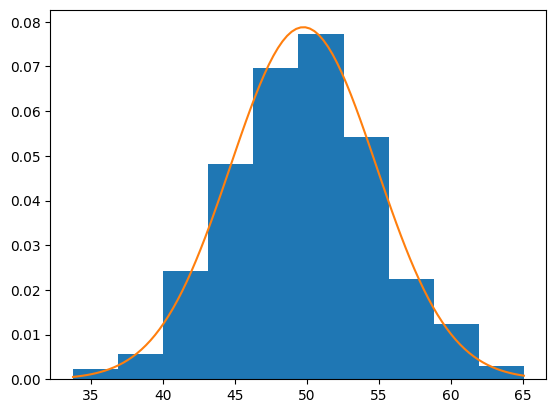

In [50]:
# plot the histogram

plt.hist(sample, bins=10, density=True)
plt.plot(values, probability_density)

### Kernel Density Estimation

In [60]:
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

sample

array([17.98208586, 17.60661602, 10.16862961, 21.67908869, 12.60222718,
       17.32147779, 17.7202848 , 27.01425415, 16.52632192, 19.19747853,
       18.67561729, 19.49881849, 17.87607465, 24.39652483, 29.47431959,
       19.38253416, 22.62505994, 14.05365495, 23.79927931, 23.7460849 ,
       13.46947353, 19.70248313, 30.20669377, 17.79301641, 14.97714253,
       19.23983736, 14.27274308, 21.09003951, 17.44505892, 15.80773563,
       28.68830318, 21.37974748, 19.4691568 , 17.4424178 , 16.73506745,
       13.28626785, 13.45779927, 11.06720997, 26.04495029, 26.94977773,
       23.83013713, 23.48827943, 20.02959141, 19.42096787, 24.64919951,
       18.62527806, 24.69127325, 25.79003785, 15.59439541, 14.11015751,
       24.59814123, 19.03698587, 19.95363266, 23.90024221, 20.60840749,
       16.42009249, 13.59163773, 11.15046596, 17.69222952, 28.56935784,
       26.68086862, 21.89755354, 12.13407267, 20.41103909, 19.12898045,
        9.81218478, 19.29335357, 20.54740937, 10.91067275, 19.93

(array([ 2.,  2.,  3.,  7.,  4.,  9., 15., 16., 15., 15., 28., 18., 35.,
        14., 22., 16., 17., 16., 14., 15.,  8., 10., 13., 10., 14., 16.,
        26., 36., 50., 46., 49., 40., 52., 67., 56., 37., 36., 38., 37.,
        25., 16., 13.,  7.,  4.,  1.,  6.,  3.,  0.,  0.,  1.]),
 array([ 7.08982784,  8.08973473,  9.08964162, 10.08954851, 11.0894554 ,
        12.08936229, 13.08926918, 14.08917607, 15.08908296, 16.08898985,
        17.08889674, 18.08880363, 19.08871052, 20.08861741, 21.0885243 ,
        22.08843119, 23.08833808, 24.08824497, 25.08815186, 26.08805875,
        27.08796564, 28.08787253, 29.08777942, 30.08768631, 31.0875932 ,
        32.08750009, 33.08740698, 34.08731387, 35.08722076, 36.08712765,
        37.08703454, 38.08694143, 39.08684832, 40.08675521, 41.0866621 ,
        42.08656899, 43.08647588, 44.08638277, 45.08628966, 46.08619656,
        47.08610345, 48.08601034, 49.08591723, 50.08582412, 51.08573101,
        52.0856379 , 53.08554479, 54.08545168, 55.08535857,

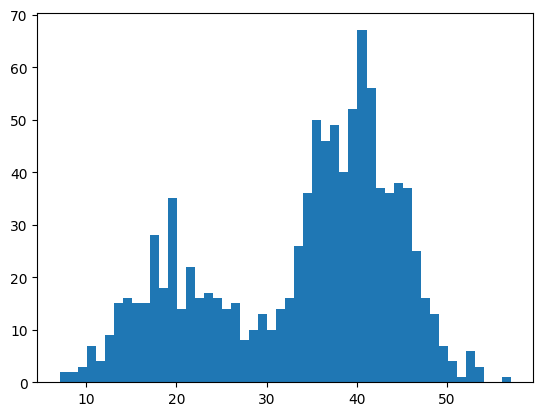

In [61]:
plt.hist(sample, bins=50)

In [62]:
model = KernelDensity(bandwidth=3, kernel='gaussian')

sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=3)

In [63]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape((len(values), 1))
values

array([[ 7.08982784],
       [ 7.59483132],
       [ 8.0998348 ],
       [ 8.60483828],
       [ 9.10984176],
       [ 9.61484524],
       [10.11984872],
       [10.6248522 ],
       [11.12985568],
       [11.63485916],
       [12.13986264],
       [12.64486612],
       [13.1498696 ],
       [13.65487308],
       [14.15987656],
       [14.66488004],
       [15.16988352],
       [15.674887  ],
       [16.17989048],
       [16.68489396],
       [17.18989744],
       [17.69490092],
       [18.1999044 ],
       [18.70490788],
       [19.20991136],
       [19.71491483],
       [20.21991831],
       [20.72492179],
       [21.22992527],
       [21.73492875],
       [22.23993223],
       [22.74493571],
       [23.24993919],
       [23.75494267],
       [24.25994615],
       [24.76494963],
       [25.26995311],
       [25.77495659],
       [26.27996007],
       [26.78496355],
       [27.28996703],
       [27.79497051],
       [28.29997399],
       [28.80497747],
       [29.30998095],
       [29

In [64]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

probabilities

array([0.00200489, 0.00243998, 0.00293599, 0.00349536, 0.00411968,
       0.00480939, 0.00556365, 0.00638017, 0.00725506, 0.00818285,
       0.0091565 , 0.01016747, 0.01120574, 0.01225982, 0.01331665,
       0.01436148, 0.0153777 , 0.01634693, 0.01724932, 0.01806426,
       0.01877155, 0.01935283, 0.01979327, 0.02008307, 0.02021868,
       0.02020334, 0.02004688, 0.01976479, 0.01937674, 0.01890476,
       0.01837149, 0.01779871, 0.01720644, 0.01661265, 0.01603361,
       0.01548456, 0.01498076, 0.01453839, 0.01417533, 0.0139116 ,
       0.01376929, 0.01377213, 0.01394451, 0.01431024, 0.01489083,
       0.01570363, 0.01675991, 0.01806292, 0.01960644, 0.02137378,
       0.0233376 , 0.02546073, 0.02769785, 0.02999807, 0.03230797,
       0.0345748 , 0.03674934, 0.03878796, 0.04065374, 0.04231649,
       0.0437519 , 0.04494017, 0.04586473, 0.0465113 , 0.04686775,
       0.04692464, 0.0466765 , 0.04612313, 0.04527075, 0.0441325 ,
       0.04272814, 0.04108301, 0.03922653, 0.03719056, 0.03500

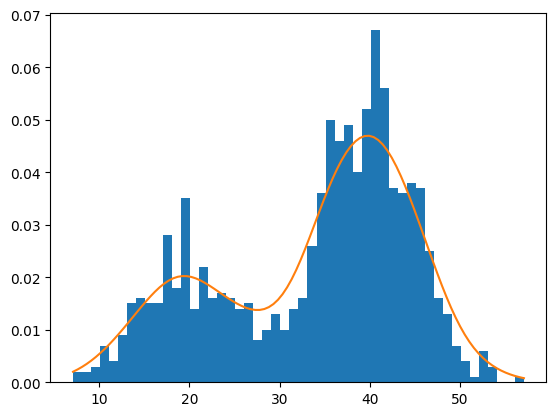

In [66]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

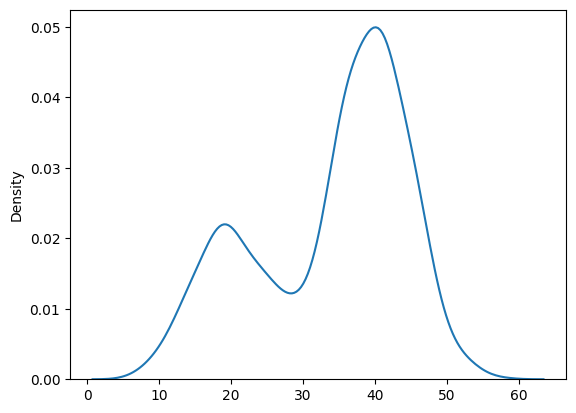

In [72]:
sns.kdeplot(sample.reshape(1000), bw_adjust=0.8)